<a href="https://colab.research.google.com/github/Fitomarcelindo/Analisa-Algortima-With-Python/blob/main/DatasetCSGOBigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
from sklearn.metrics import accuracy_score

In [5]:
Marcel = pd.read_csv('csgo.csv')
Marcel

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,74.90,7.0,10.0,de_train,False,327.0,355.0,376.0,183.0,6350.0,13300.0,3.0,1.0,T
1996,31.23,7.0,10.0,de_train,True,227.0,152.0,276.0,183.0,5000.0,7900.0,2.0,1.0,T
1997,11.23,7.0,10.0,de_train,True,185.0,105.0,266.0,183.0,5300.0,4450.0,2.0,1.0,T
1998,174.91,7.0,11.0,de_train,False,500.0,500.0,55.0,0.0,14900.0,32000.0,0.0,0.0,T


In [6]:
Marcel.columns=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10",
                 "A11","A12","A13","Class"]

In [7]:
Marcel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2000 non-null   float64
 1   A2      2000 non-null   float64
 2   A3      2000 non-null   float64
 3   A4      2000 non-null   object 
 4   A5      2000 non-null   bool   
 5   A6      2000 non-null   float64
 6   A7      2000 non-null   float64
 7   A8      2000 non-null   float64
 8   A9      2000 non-null   float64
 9   A10     2000 non-null   float64
 10  A11     2000 non-null   float64
 11  A12     2000 non-null   float64
 12  A13     2000 non-null   float64
 13  Class   2000 non-null   object 
dtypes: bool(1), float64(11), object(2)
memory usage: 205.2+ KB


In [8]:
Marcel

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,Class
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,74.90,7.0,10.0,de_train,False,327.0,355.0,376.0,183.0,6350.0,13300.0,3.0,1.0,T
1996,31.23,7.0,10.0,de_train,True,227.0,152.0,276.0,183.0,5000.0,7900.0,2.0,1.0,T
1997,11.23,7.0,10.0,de_train,True,185.0,105.0,266.0,183.0,5300.0,4450.0,2.0,1.0,T
1998,174.91,7.0,11.0,de_train,False,500.0,500.0,55.0,0.0,14900.0,32000.0,0.0,0.0,T


In [9]:
Marcel['Class'].value_counts()

T     1176
CT     824
Name: Class, dtype: int64

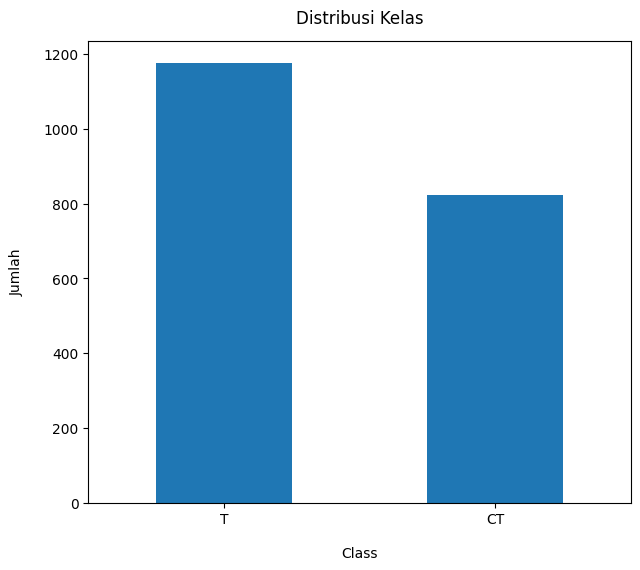

In [10]:
Marcel['Class'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)

plt.xlabel("Class", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Kelas", y=1.02)

plt.show()

In [11]:
for col in ['A4', 'A5', 'Class']:
    le = LabelEncoder()
    Marcel[col] = le.fit_transform(Marcel[col])

print(Marcel['A4'].unique(), Marcel['A5'].unique(), Marcel['Class'].unique())

[0 2 3 1 4 6 5] [0 1] [0 1]


In [12]:
# x dan y
x = np.asarray(Marcel.drop(['Class'], axis=1))
y = np.asarray(Marcel['Class'])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [14]:
Marcel.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,Class
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,95.630205,6.840000,6.28850,2.532000,0.132000,406.170500,402.987500,306.749000,309.54450,7867.350000,12377.600000,1.821500,3.009500,0.588000
std,53.734491,4.233599,4.19059,1.679103,0.338575,137.616258,137.699186,172.857221,168.68957,9017.491838,12209.581798,1.774884,1.960952,0.492318
min,0.050000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.910000,3.000000,3.00000,2.000000,0.000000,315.750000,328.750000,188.000000,190.00000,1200.000000,1700.000000,0.000000,1.000000,0.000000
50%,94.910000,7.000000,6.00000,2.000000,0.000000,500.000000,500.000000,300.000000,362.00000,4000.000000,9075.000000,1.000000,4.000000,1.000000
75%,156.425000,10.000000,10.00000,3.000000,0.000000,500.000000,500.000000,488.000000,467.00000,11762.500000,19250.000000,3.000000,5.000000,1.000000
max,175.000000,15.000000,15.00000,6.000000,1.000000,500.000000,500.000000,500.000000,500.00000,58050.000000,67700.000000,5.000000,5.000000,1.000000


In [15]:
# Loop untuk setiap kolom
for col in Marcel.columns:
    print(f"\nDistribusi untuk Kolom {col}:\n{Marcel[col].value_counts()}")



Distribusi untuk Kolom A1:
175.00    124
174.95     91
94.95      74
114.95     74
74.95      63
         ... 
70.72       1
90.72       1
110.72      1
170.72      1
11.23       1
Name: A1, Length: 609, dtype: int64

Distribusi untuk Kolom A2:
4.0     240
3.0     213
9.0     161
10.0    159
5.0     147
12.0    143
7.0     132
1.0     123
11.0    115
0.0     105
8.0      97
2.0      86
14.0     85
6.0      73
15.0     65
13.0     56
Name: A2, dtype: int64

Distribusi untuk Kolom A3:
0.0     215
6.0     169
4.0     167
7.0     160
5.0     152
3.0     148
9.0     143
8.0     121
1.0     120
10.0    120
12.0    107
11.0    106
2.0     102
13.0     80
14.0     48
15.0     42
Name: A3, dtype: int64

Distribusi untuk Kolom A4:
2    553
3    509
0    302
1    183
4    172
6    155
5    126
Name: A4, dtype: int64

Distribusi untuk Kolom A5:
0    1736
1     264
Name: A5, dtype: int64

Distribusi untuk Kolom A6:
500.0    1107
400.0     115
100.0      77
200.0      72
300.0      70
         ... 

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [17]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

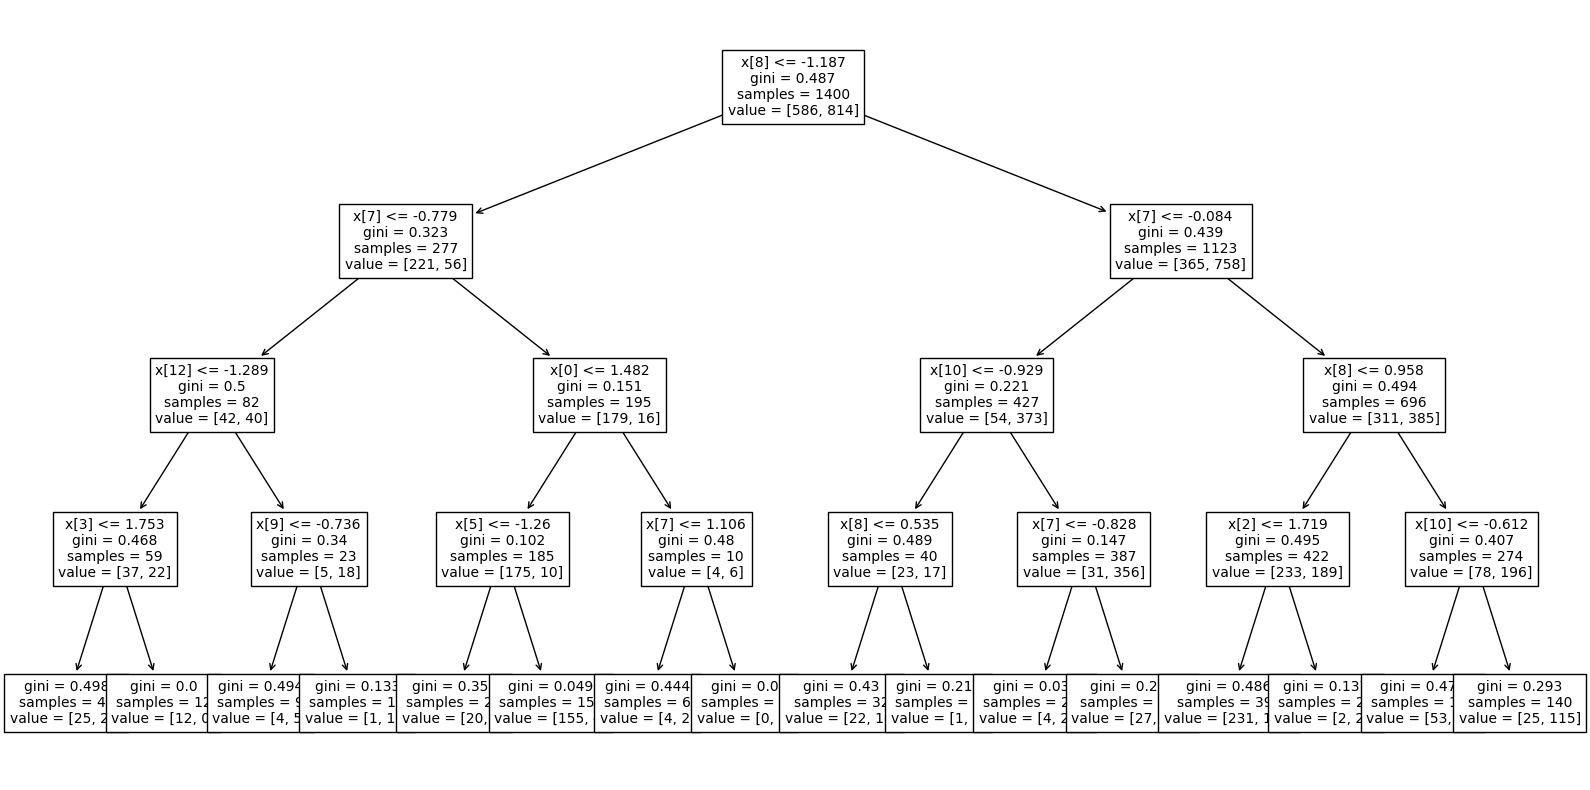

In [18]:
plt.subplots(figsize = (20, 10))
tree.plot_tree(model, fontsize=10)
plt.show()

In [19]:
predict = model.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,predict) * 100)

Accuracy score:  71.0


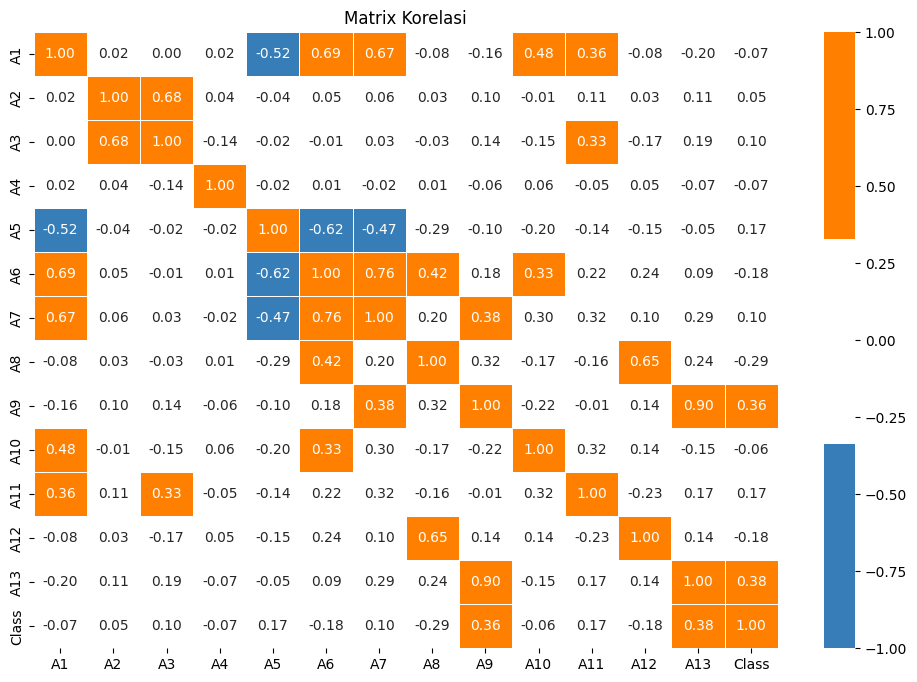

In [20]:
correlation_matrix = Marcel.corr()
# Membuat palet warna sesuai dengan referensi
colors = ['#377eb8', 'white', '#ff7f00']
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette(colors),
            vmin=-1, vmax=1, fmt=".2f", linewidths=.5, center=0)
plt.title('Matrix Korelasi')
plt.show()
